In [42]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [43]:

vocab_size = 10000
max_len = 200

In [44]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [45]:
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 128, input_length=max_len),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [47]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [48]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
782/782 [==============================] - 39s 49ms/step - loss: 0.3966 - accuracy: 0.8090
Epoch 2/5
782/782 [==============================] - 41s 53ms/step - loss: 0.0887 - accuracy: 0.9684
Epoch 3/5
782/782 [==============================] - 42s 54ms/step - loss: 0.0095 - accuracy: 0.9968
Epoch 4/5
782/782 [==============================] - 36s 46ms/step - loss: 9.8402e-04 - accuracy: 0.9996
Epoch 5/5
782/782 [==============================] - 37s 48ms/step - loss: 6.6762e-05 - accuracy: 1.0000


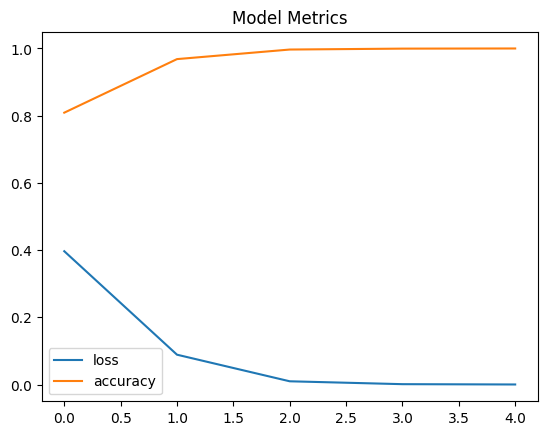

In [49]:
pd.DataFrame(history.history).plot()
plt.title("Model Metrics")
plt.show()

In [50]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test)

# Displaying the results
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i], ": ", results[i])

print("The accuracy of the model on the test set is: ", results[1]*100, "%")

print("Generate predictions for all samples")
predicted_probs = model.predict(x_test[:len(x_test)]) 

# Converting the predicted probabilities to predicted labels
predicted_labels = (predicted_probs > 0.5).astype(int)

# Displaying the predicted and actual values
for i in range(len(predicted_labels)):
    print("Predicted Label: ", predicted_labels[i][0], "|", " Actual value: ", y_test[i])




Evaluate on test data
782/782 [==============================] - 10s 12ms/step - loss: 1.3074 - accuracy: 0.8423
loss :  1.3073540925979614
accuracy :  0.8422799706459045
The accuracy of the model on the test set is:  84.22799706459045 %
Generate predictions for all samples
782/782 [==============================] - 9s 11ms/step
Predicted Label:  0 |  Actual value:  0
Predicted Label:  1 |  Actual value:  1
Predicted Label:  1 |  Actual value:  1
Predicted Label:  0 |  Actual value:  0
Predicted Label:  1 |  Actual value:  1
Predicted Label:  0 |  Actual value:  1
Predicted Label:  1 |  Actual value:  1
Predicted Label:  0 |  Actual value:  0
Predicted Label:  1 |  Actual value:  0
Predicted Label:  1 |  Actual value:  1
Predicted Label:  1 |  Actual value:  1
Predicted Label:  0 |  Actual value:  0
Predicted Label:  0 |  Actual value:  0
Predicted Label:  0 |  Actual value:  0
Predicted Label:  1 |  Actual value:  1
Predicted Label:  0 |  Actual value:  0
Predicted Label:  1 |  Actual

In [52]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predicted_labels))

Confusion Matrix: 
[[10723  1777]
 [ 2166 10334]]


In [53]:
model.save("imdb_model.savedmodel")

INFO:tensorflow:Assets written to: imdb_model.savedmodel\assets
